In [1]:
# Install libraries
!pip install diffusers transformers accelerate
!pip install ftfy


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
from PIL import Image, ImageOps, ImageDraw
import torch
from diffusers import StableDiffusionInpaintPipeline
import requests
from io import BytesIO

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

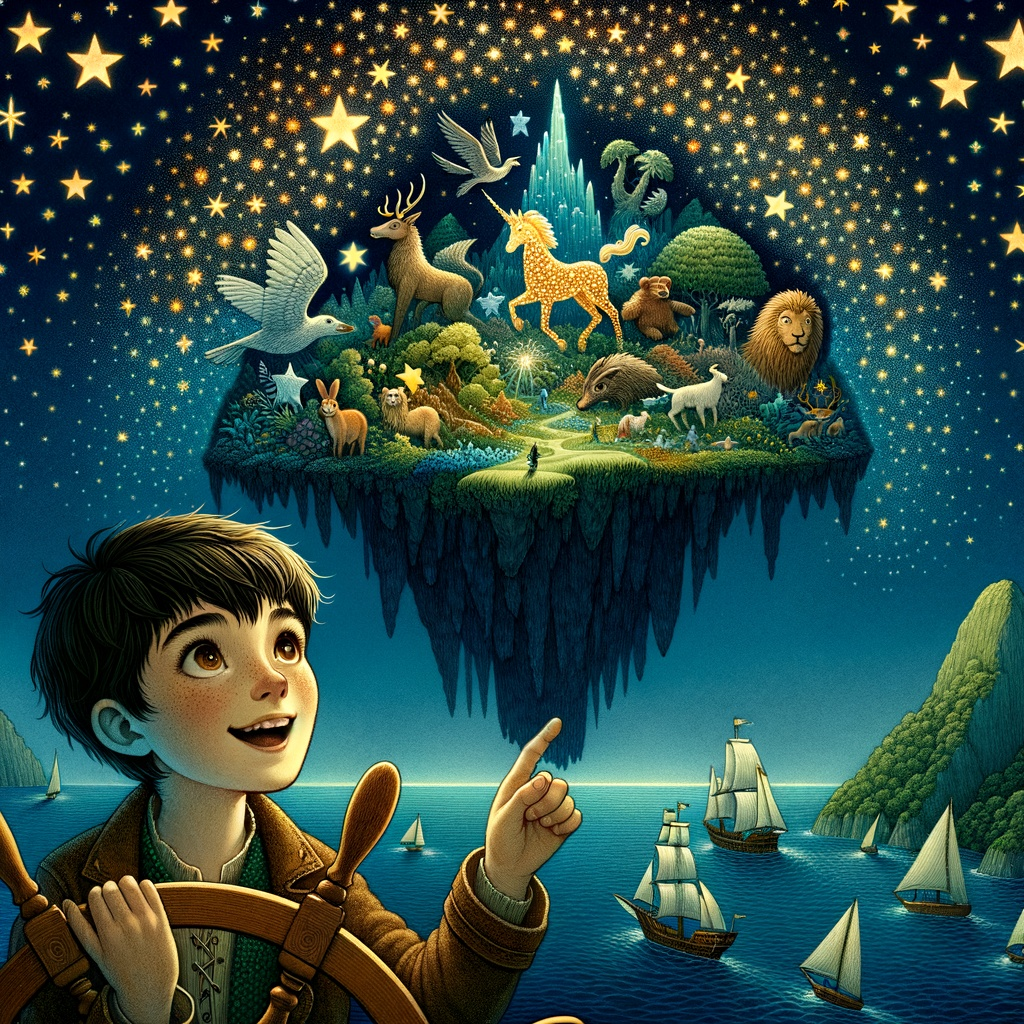

In [9]:
from PIL import Image

#image path on Google Drive
image_path = '/content/drive/MyDrive/Image/assignment.jpg'
original_image = Image.open(image_path)

original_image # Display the image

In [10]:
# the size to extend (128 pixels on each side)
extend_by = 128
new_width = original_image.width + 2 * extend_by
new_height = original_image.height + 2 * extend_by

In [11]:
# Extend the canvas
extended_image = ImageOps.expand(original_image, border=extend_by, fill=(255, 255, 255))


In [12]:
# Load the Stable Diffusion model
pipe = StableDiffusionInpaintPipeline.from_pretrained("runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16)
pipe = pipe.to("cuda")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

text_encoder/model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/51388a731f57604945fddd703ecb5c50e8e7b49d/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/51388a731f57604945fddd703ecb5c50e8e7b49d/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/51388a731f57604945fddd703ecb5c50e8e7b49d/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/51388a731f57604945fddd703ecb5c50e8e7b49d/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [13]:
# Prepare the mask (white areas for inpainting)
mask = Image.new("L", (new_width, new_height), 0)
mask_draw = ImageDraw.Draw(mask)
mask_draw.rectangle([0, 0, new_width, extend_by], fill=255)  # Top
mask_draw.rectangle([0, new_height-extend_by, new_width, new_height], fill=255)  # Bottom
mask_draw.rectangle([0, 0, extend_by, new_height], fill=255)  # Left
mask_draw.rectangle([new_width-extend_by, 0, new_width, new_height], fill=255)  # Right


In [14]:
# Convert images to the correct format
extended_image = extended_image.convert("RGB")
mask = mask.convert("L")


In [18]:
# Run the outpainting process
outpainted_image = pipe(prompt="A fantasy scene with a boy, floating island, and animals under a starry sky",
                        image=extended_image,
                        mask_image=mask).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

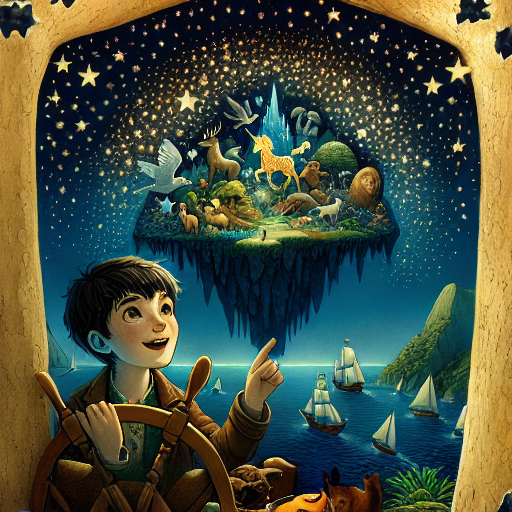

In [16]:
# Save and display the outpainted image
outpainted_image.save("outpainted_image.png")
display(outpainted_image)

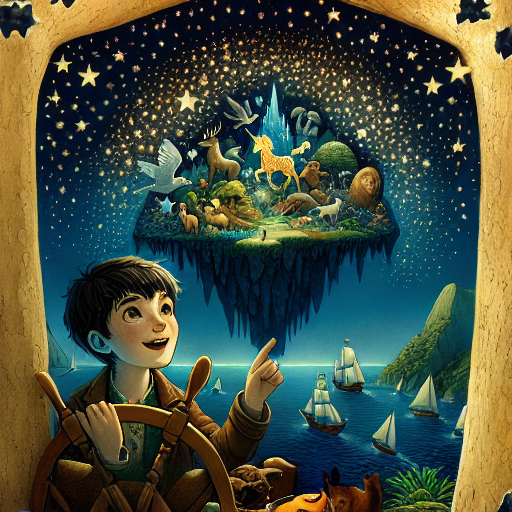

In [21]:
from PIL import Image

#image on Google Drive
original_image_path = '/content/drive/MyDrive/Image/assignment.jpg'
extended_image_path = '/content/drive/MyDrive/Image/extended.png'


original_image= Image.open(original_image_path)
extended_image = Image.open(extended_image_path)


original_image
extended_image # Display the image

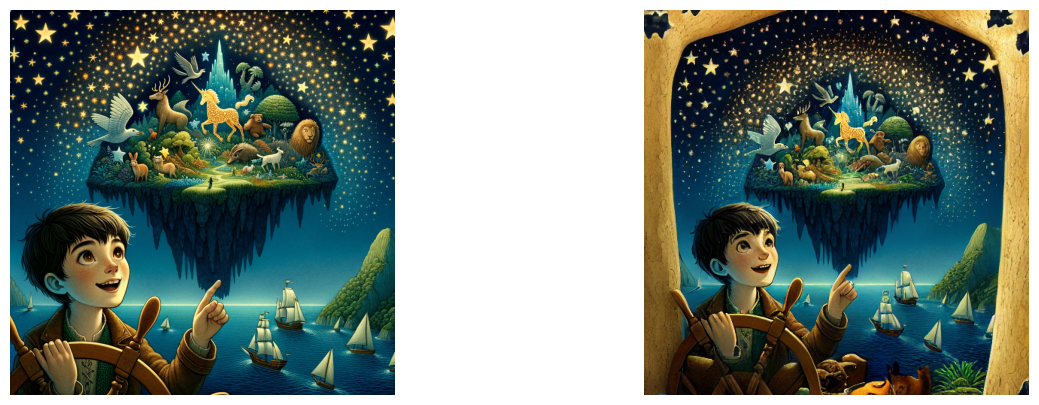

In [25]:
from PIL import Image
import matplotlib.pyplot as plt

# Replace with the actual paths to your images on Google Drive
image_paths = [
    '/content/drive/MyDrive/Image/assignment.jpg',
    '/content/drive/MyDrive/Image/extended.png',  # Add another image path here
]

# Create subplots for each image
fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))

# Display each image in a separate subplot
for i, path in enumerate(image_paths):
    image = Image.open(path)
    axes[i].imshow(image)
    axes[i].axis('off')  # Hide axis labels


plt.show()